In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('data/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

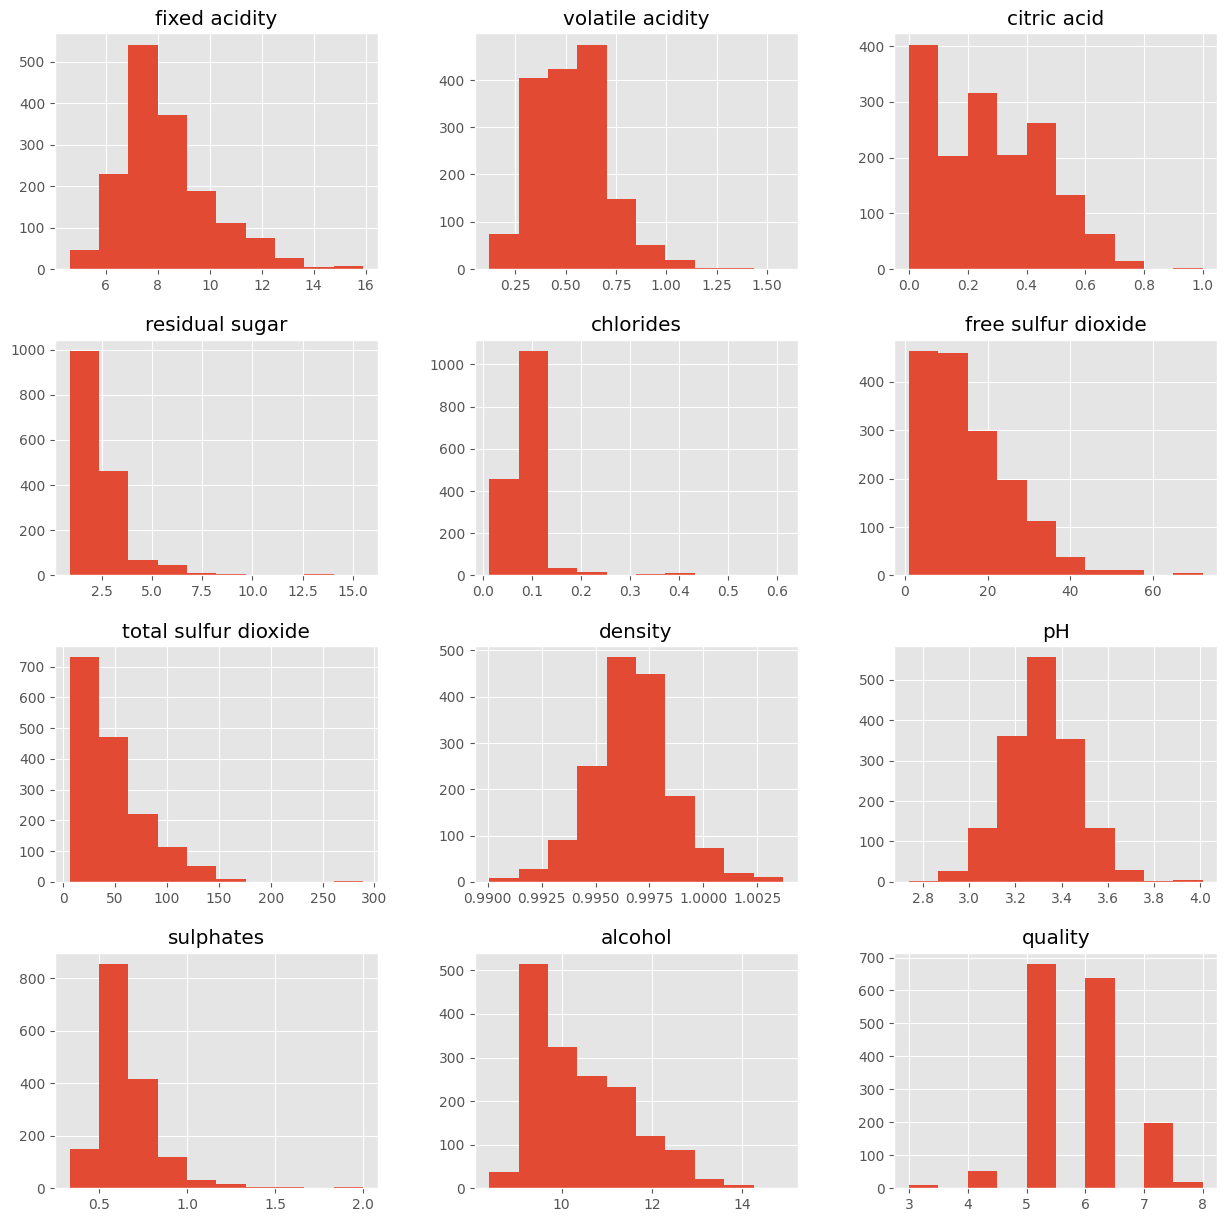

In [5]:
X = df.drop('quality', axis = 1).values # drop target variable
y1 = df['quality'].values
pd.DataFrame.hist(df, figsize = [15,15])

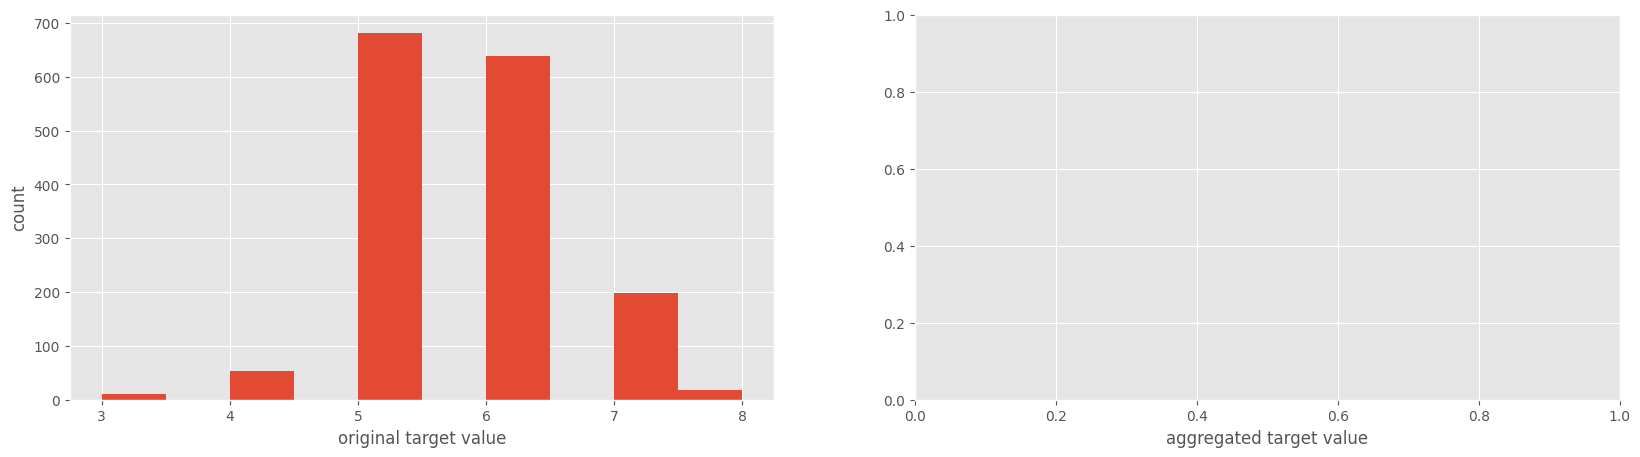

In [14]:
# import numpy as np
y = y1 <= 5 # is the rating <= 5?
# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y1)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
# plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

In [9]:
y

array([ True,  True,  True, ..., False,  True, False])

In [17]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.612500


In [19]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.66      0.64      0.65       179
        True       0.56      0.57      0.57       141

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



### 通过预处理后提高准确率

In [20]:
from sklearn.preprocessing import scale
Xs = scale(X)
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.712500
k-NN score for training set: 0.814699
              precision    recall  f1-score   support

       False       0.72      0.79      0.75       179
        True       0.70      0.62      0.65       141

    accuracy                           0.71       320
   macro avg       0.71      0.70      0.70       320
weighted avg       0.71      0.71      0.71       320



### 居中、缩放和 Logistic 回归


我将探讨在另一个基本模型逻辑回归中缩放和集中数值数据的作用。

In [24]:
# Import necessary packages
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import datasets
from sklearn import linear_model
import numpy as np
# import boston data


# Load data
# boston = datasets.load_boston()

boston = pd.read_csv('data/Boston.csv')
boston.head()

,rownames,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 缩放合成数据